## 1.	Introduction
Music influences emotions,and this project aims to build an emotion-aware song recommendation system using Spotify's music dataset and machine learning techniques. By leveraging natural language processing (NLP), sentiment analysis, and clustering, the system will analyze song lyrics, metadata, and user preferences to suggest suitable tracks .
## 2. Objective 
•Provide emotion-driven music recommendations for users.
•Analyze song lyrics and metadata to categorize songs by sentiment.
•Improve playlist curation using audio features, genres, and popularity metrics.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Exploratory Data Analysis (EDA)
EDA provides insights into the dataset, including: 
•Emotion Distribution: Understanding sentiment patterns in songs. 
•Genre Distribution: Identifying emotional diversity across music genres. 
•Popularity Analysis: Evaluating song rankings and user engagement

In [15]:
df=pd.read_csv("S:/project/light_spotify_dataset.csv")
print(df)
print(df.head(20))

                              artist                   song  emotion  \
0                               ABBA  She's My Kind Of Girl      joy   
1                               ABBA       Andante, Andante     love   
2                               ABBA         As Good As New  sadness   
3                               ABBA                   Bang      joy   
4                               ABBA       Bang-A-Boomerang      joy   
...                              ...                    ...      ...   
236983                  (Eri Sasaki)        Gate Of Steiner  sadness   
236984             (Elena Tsagrinou)              El Diablo     love   
236985                  (Dima Bilan)                Believe      joy   
236986                   (Ani Lorak)             Shady Lady      joy   
236987    (Alla Pugacheva) & 50 Cent    Позови меня P.I.M.P    anger   

        variance                    Genre  Release Date     Key  Tempo  \
0       0.447619                      pop          2014   F M

In [19]:
df1=df.copy()
pd.reset_option("display.max_row")
df1.columns = df1.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

print(df1.isnull().sum())
df1.describe()

## 4. Emotion Distribution
•Classifying songs into categories such as joyful, melancholic, energetic, relaxing, etc.
•Using sentiment analysis to extract emotional tones from song lyrics. 
•Data visualization aids in understanding emotional trends.

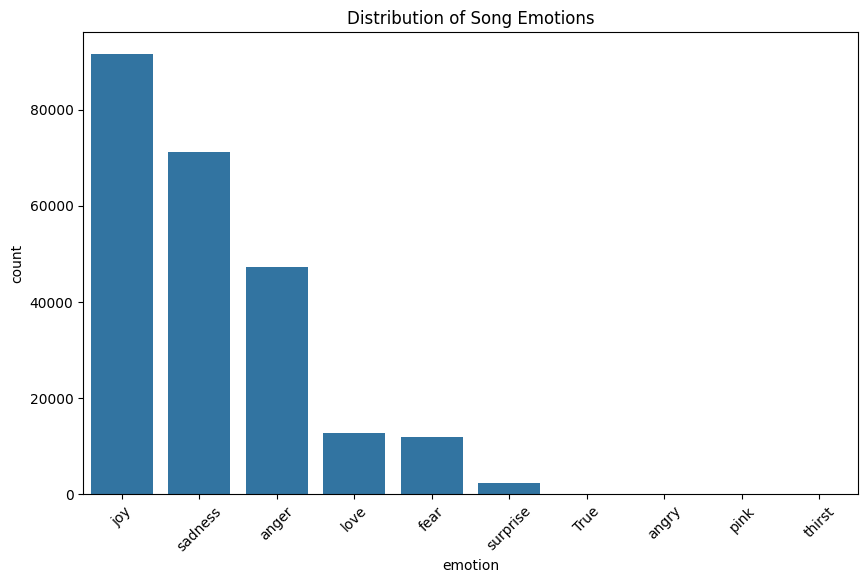

In [22]:
# Emotion Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='emotion',order=df['emotion'].value_counts().index)
plt.title('Distribution of Song Emotions')
plt.xticks(rotation=45)
plt.show()

In [23]:
df1['emotion'] = df1['emotion'].replace('angry', 'anger')

## 5. Genre Distribution 
•Examining how different genres express emotions (e.g., pop for happiness, blues for sorrow)
. •Genre clustering helps improve emotion-based recommendations.
•Mapping musical structures that influence emotional perception


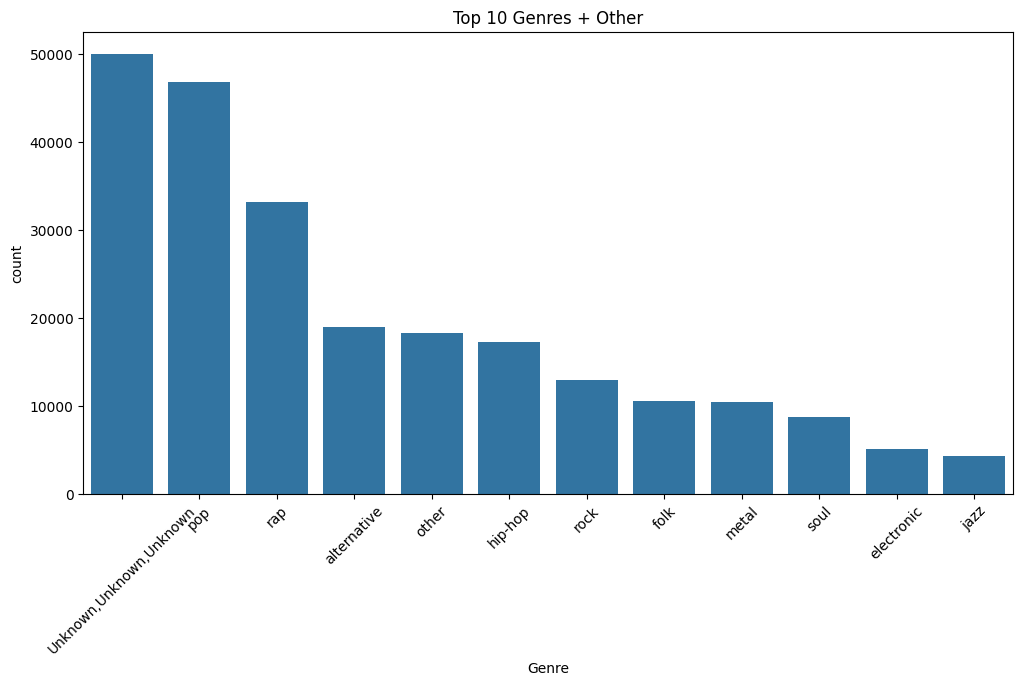

In [24]:
# Genre Distribution
top_genres = df['Genre'].value_counts().nlargest(11).index
df['Genre']=df['Genre'].apply(lambda x: x if x in top_genres else 'other')

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

Genre
other          0.288120
pop            0.197829
rap            0.140108
alternative    0.080380
hip-hop        0.073071
rock           0.054669
folk           0.044812
metal          0.044268
soul           0.036884
electronic     0.021706
jazz           0.018153
Name: proportion, dtype: float64


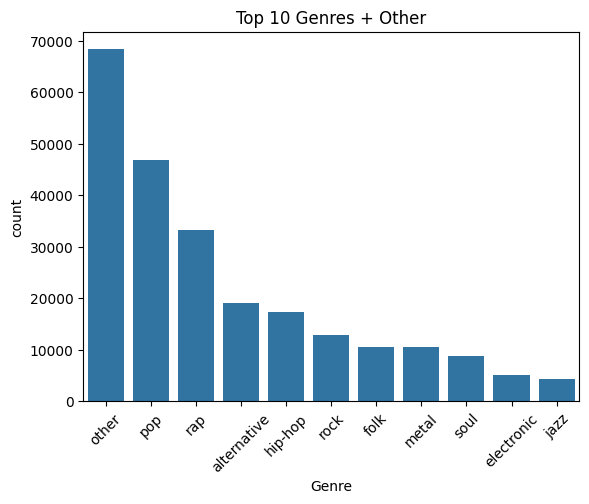

In [10]:
df['Genre']=df['Genre'].replace('Unknown,Unknown,Unknown','other')
print(df['Genre'].value_counts(normalize=True))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

# Popularity Distribution
•Analyzing the popularity of songs and artists based on emotional resonance. 
•Identifying patterns in streaming frequency and user mood preferences. 
•Enhancing the recommendation system by integrating trending emotional choices .


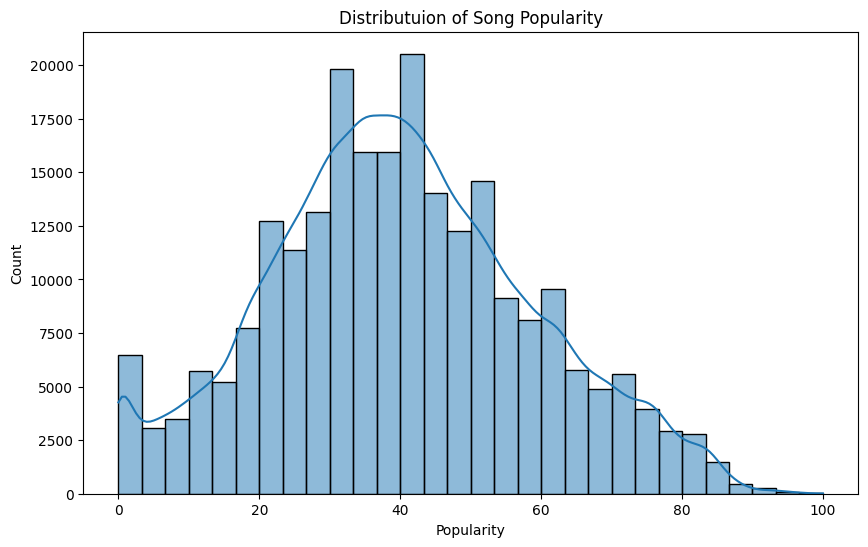

In [12]:
# Popularity Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'],bins=30, kde=True)
plt.title('Distributuion of Song Popularity')
plt.show()

## 7. Word Cloud for Song Titles
•A word cloud visualization displays common words in song titles related to emotions.
•Helps in detecting lyrical themes associated with different moods. 
•Supports text-based filtering for emotion-driven song selection


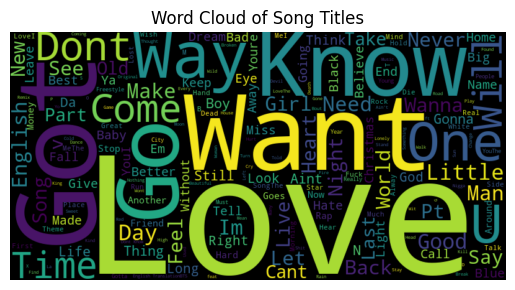

In [25]:
#word Cloud of Song Titles

from wordcloud import WordCloud

text =''.join(df['song'].dropna())

wordcloud = WordCloud(width=800,height=400, background_color='black').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Titles')
plt.axis('off')
plt.show()

## 8. Emotion-Based Song Recommendation
•Implementing sentiment analysis on song lyrics for emotion classification. 
•Creating personalized mood-based playlists using AI-driven techniques. 
•Utilizing feedback loops for improving recommendation accuracy .


In [34]:
# Emotion-Based Song Recommender



import difflib

# A fuzzy matching function 
def fuzzy_match_emotion(user_input, valid_emotions):
    closest = difflib.get_close_matches(user_input, valid_emotions, n=1, cutoff=0.5)
    return closest[0] if closest else None

# Alias conversion, fuzzy matching, and fallback mechanism
def recommend_by_emotion_fuzzy(emotion_label, top_n=10):
    #  Alias mapping table

    emotion_aliases = {
        'happy': 'joy',
        'cheerful': 'joy',
        'romance': 'love',
        'romantic': 'love',
        'depressed': 'sadness',
        'mad': 'anger',
        'rage': 'anger',
        'relax': 'joy',
        'chill': 'joy',
        'cry': 'sadness'
    }

    valid_emotions = df['emotion'].unique().tolist()

    # Alias conversion
    if emotion_label in emotion_aliases:
        emotion_label = emotion_aliases[emotion_label]

    # Handling null values
    if not emotion_label:
        print("No emotion specified. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    # Fuzzy matching: Find the closest valid emotion.
    matched_emotion = fuzzy_match_emotion(emotion_label, valid_emotions)

    if not matched_emotion:
        print(f"No close match for emotion: '{emotion_label}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    # Normally recommend the most popular songs under that emotion.
    filtered = df[df['emotion'] == matched_emotion]

    if filtered.empty:
        print(f"No songs found for emotion: '{matched_emotion}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    print(f"Showing songs for emotion: '{matched_emotion}'")
    top_songs = filtered.sort_values(by='Popularity', ascending=False).head(top_n)
    return top_songs[['song', 'artist', 'Genre', 'Popularity']]

# Enter your Mood Now

In [36]:
recommend_by_emotion_fuzzy('love')

Showing songs for emotion: 'love'


,song,artist,Genre,Popularity
219935,Ours,Ben&Ben,"Unknown,Unknown,Unknown",100
20120,"Actress, Model...",Unwritten Law,alternative,94
235802,21 Way Freestyle,21 Savage,rap,93
226165,I Wanna Be Yours,Arctic Monkeys,alternative,93
114982,All Night / Tall Sprite,Playboi Carti,rap,93
74242,Green Purple,Travis Scott,rap,93
74301,Pour Up,Travis Scott,rap,93
157910,10000 Hours Cover,Jung Kook (),"Unknown,Unknown,Unknown",92
39077,One Dance (Remix),Justin Bieber,pop,90
149830,Carry On,Kygo & Rita Ora,"Unknown,Unknown,Unknown",90


# Feature-Based Similarity Recommender
•Extracting audio features (tempo, pitch, loudness, spectral contrast) for song comparison. 
•Machine learning methods such as Cosine Similarity, KNN (K-Nearest Neighbors), and PCA ensure precise matching.
•Enhancing user experience by providing emotion aware song suggestions.


In [37]:
# Feature-Based Similarity Recommender
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np


feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']



scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])


# index
song_to_index = pd.Series(df.index, index=df['song']).dropna()



def recommend_similar_songs(song_name, top_n=10):
    if song_name not in song_to_index:
        print(f"Song '{song_name}' not found in dataset. Try another one.")
        return df.sample(n=top_n)[['song','artist','Genre','Popularity']]
    
    idx = song_to_index[song_name]
    target_vector = X_scaled[idx].reshape(1, -1)
    sim_scores = cosine_similarity(target_vector, X_scaled)[0]

    top_indices = np.argsort(sim_scores)[::-1]  # 由大到小
    top_indices = top_indices[top_indices != idx][:top_n]


    return df.iloc[top_indices][['song', 'artist', 'Genre', 'Popularity']]


In [38]:
recommend_similar_songs('Bang-A-Boomerang')

,song,artist,Genre,Popularity
3,Bang,ABBA,pop,52
18784,Let Me Love You Baby,Stevie Ray Vaughan,rock,46
178135,You,George Harrison,rock,38
14868,The Boy From The Chemist Is Here To See You,Omd,pop,16
79937,Fun House,The Stooges,other,32
51658,There Is A Light That Never Goes Out,Smiths,alternative,83
80053,There Is a Light That Never Goes Out,The Smiths,alternative,82
4200,Twistin' The Night Away,Divine,pop,11
14593,Mechanical Wonder,Ocean Colour Scene,pop,32
221534,One Little Slip,Barenaked Ladies,alternative,46


## 10. User Profile Clustering Recommendation
•Grouping users based on listening behavior and emotional music preferences. 
•Using K-Means and hierarchical clustering to improve recommendation accuracy. 
•Enabling playlist personalization for specific user moods


In [39]:
# User Profile Clustering Recommender
from sklearn.cluster import KMeans

# Still use the previous feature columns
feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']

# The data has already been standardized, so we'll directly use X_scaled.
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the clustering results to the DataFrame
df['cluster'] = cluster_labels

#"Simulate a user preference vector with a preference for high energy and danceability
user_profile = {
    'Energy': 80,
    'Danceability': 85,
    'Positiveness': 70,
    'Tempo': 120,
    'Acousticness': 10,
    'Instrumentalness': 5
}

# Convert to a DataFrame and standardize it
user_df = pd.DataFrame([user_profile])
user_scaled = scaler.transform(user_df)

user_cluster = kmeans.predict(user_scaled)[0]

def recommend_from_cluster(user_cluster, top_n=10):
    subset = df[df['cluster'] == user_cluster]
    return subset.sort_values(by='Popularity', ascending=False).head(top_n)[['song', 'artist', 'Genre', 'Popularity']]

In [40]:
recommend_from_cluster(user_cluster)

,song,artist,Genre,Popularity
88927,​working,Tate McRae & Khalid,"Unknown,Unknown,Unknown",97
88928,​lie to me,Tate McRae & Ali Gatie,"Unknown,Unknown,Unknown",97
88931,3am,Tate McRae,"Unknown,Unknown,Unknown",97
170424,I See Dead People,Iam GreedyBoy,"Unknown,Unknown,Unknown",97
123017,Hurt Somebody,Noah Kahan & Julia Michaels,"Unknown,Unknown,Unknown",95
13037,Que Sera!,Miley Cyrus,pop,94
13034,Old Blue Jeans,Miley Cyrus,pop,94
43990,This Is The Life,Miley Cyrus,pop,94
43899,All The Time,Miley Cyrus,pop,94
54372,Sound Siren,Unwritten Law,alternative,94


 ## 11. Logistic Regression for Emotion Classification
Based on emotional sentiment. 
•Training the model using lyrics sentiment, audio metadata, and user feedback.
•Improving prediction accuracy by detecting instrumental and lyrical emotional cues.


In [41]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Create binary labels
df['is_joy'] = df['emotion'].apply(lambda x: 1 if x == 'joy' else 0)

# Feature columns
feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']

# feature labels
X = df[feature_cols]
y = df['is_joy']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions" or "Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6112283218701211

Confusion Matrix:
 [[28968     3]
 [18424     3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     28971
           1       0.50      0.00      0.00     18427

    accuracy                           0.61     47398
   macro avg       0.56      0.50      0.38     47398
weighted avg       0.57      0.61      0.46     47398



## 12. Implementation Strategy
1.Data Collection– Gathering song metadata, lyrics, and listening history.
2.EDA & Preprocessing– Cleaning dataset and identifying emotional trends. 
3.Emotion Classification– Using NLP and sentiment analysis models for emotion detection. 
4.Feature Engineering– Extracting relevant song attributes for similarity analysis.
5.Model Training– Training clustering and classification models.
6.Recommendation Deployment– Integrating the model into a user-friendly interface. 
7.User Feedback Optimization– Refining recommendations based on user interactions


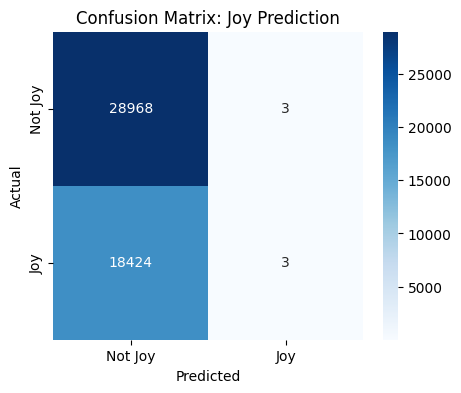

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Joy', 'Joy'], yticklabels=['Not Joy', 'Joy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Joy Prediction')
plt.show()

## 13. Challenges & Limitations
•Mapping subjective emotions accurately to songs. 
•Addressing data sparsity in music metadata for effective predictions. 
•Handling real-time recommendation processing for seamless user experience.
## 14. Future Enhancements
•Implementing real-time emotion detection via facial recognition or biometric signals. 
•Integrating multi-modal emotion recognition, including voice analysis. 
•Expanding recommendations with cross-platform integration 
(Spotify, YouTube, etc.)
## 15. Conclusion
The Emotion-Based Spotify Song Recommendation System introduces a data-driven approach to enhancing user experiences.
    By combining machine
learning, NLP, clustering, and sentiment analysis, this system creates highly personalized playlists that align with users
' emotions. Future developments aim to expand real-time emotion tracking and cross platform music recommendations for a seamless listening experience.